КоХа


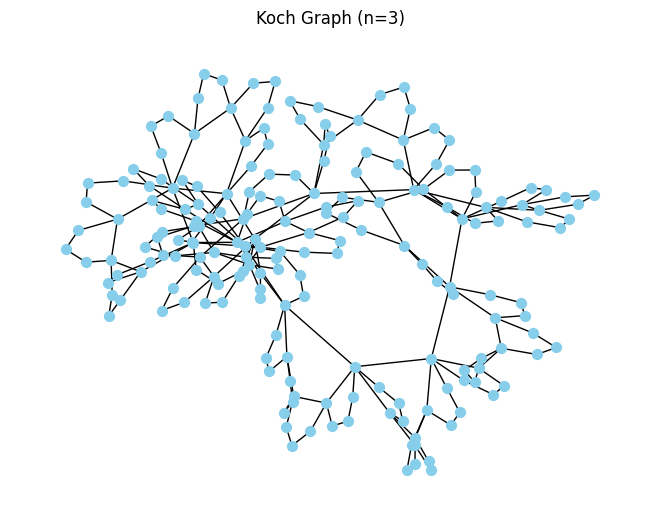

Средняя степень вершины графа Коха (n=3): 2.62


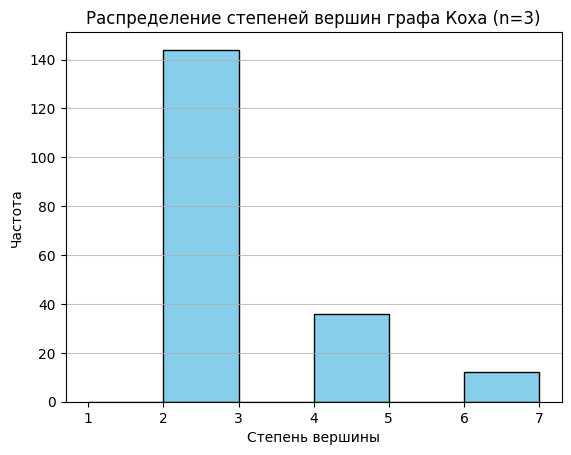

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def koch_graph(n):

    koch = nx.Graph()

    # Рекурсивное построение графа Коха
    def recursive_koch(graph, p1, p2, levels):
        if levels == 0:
            graph.add_edge(p1, p2)
            return
        # Вычисление точек деления отрезка
        s1 = ((2 * p1[0] + p2[0]) / 3, (2 * p1[1] + p2[1]) / 3)
        s3 = ((2 * p2[0] + p1[0]) / 3, (2 * p2[1] + p1[1]) / 3)
        x = (p1[0] + p2[0]) / 2 + (p2[1] - p1[1]) * (3 ** 0.5) / 6
        y = (p1[1] + p2[1]) / 2 + (p1[0] - p2[0]) * (3 ** 0.5) / 6
        s2 = (x, y)
        # Добавление новых рёбер и рекурсивный вызов
        graph.add_edges_from([(p1, s1), (s1, s2), (s2, s3), (s3, p2)])
        recursive_koch(graph, p1, s1, levels - 1)
        recursive_koch(graph, s1, s2, levels - 1)
        recursive_koch(graph, s2, s3, levels - 1)
        recursive_koch(graph, s3, p2, levels - 1)

    # Определение начального треугольника и вызов рекурсивной функции
    p1 = (0, 0)
    p2 = (1, 0)
    p3 = (0.5, (3 ** 0.5) / 2)
    recursive_koch(koch, p1, p2, n)
    recursive_koch(koch, p2, p3, n)
    recursive_koch(koch, p3, p1, n)

    return koch

# Построение и визуализация графа Коха
n = 3  # Количество уровней рекурсии
koch = koch_graph(n)
nx.draw(koch, with_labels=False, node_color='skyblue', node_size=50)
plt.title("Koch Graph (n={})".format(n))
plt.show()

# Расчет средней степени вершины и построение распределения степеней вершин
average_degree = sum(dict(koch.degree()).values()) / len(koch)
print("Средняя степень вершины графа Коха (n={}): {:.2f}".format(n, average_degree))

plt.hist(dict(koch.degree()).values(), bins=range(1, max(dict(koch.degree()).values()) + 2), color='skyblue', edgecolor='black')
plt.title("Распределение степеней вершин графа Коха (n={})".format(n))
plt.xlabel("Степень вершины")
plt.ylabel("Частота")
plt.grid(axis='y', alpha=0.75)
plt.show()


# Пирамида

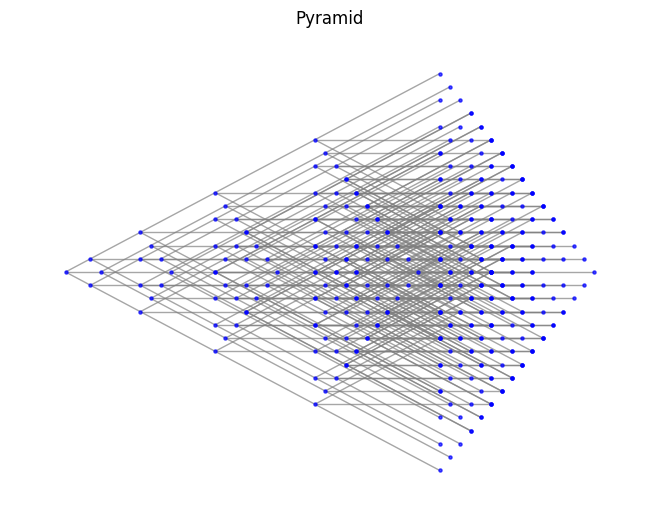

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import math

def fractal_tree(G, parent, depth, max_depth, branch_angle):
    if depth > max_depth:
        return
    num_branches = 3  # Количество ветвей
    branch_length = 0.7  # Длина ветвей
    for i in range(num_branches):
        angle = (i - (num_branches - 1) / 2) * branch_angle
        x_new = G.nodes[parent]['x'] + branch_length * depth * math.cos(angle)
        y_new = G.nodes[parent]['y'] + branch_length * depth * math.sin(angle)
        child = len(G.nodes)  # Идентификатор новой вершины
        G.add_node(child, x=x_new, y=y_new, pos=(x_new, y_new))  # Добавляем атрибут 'pos' для новой вершины
        G.add_edge(parent, child)
        fractal_tree(G, child, depth + 1, max_depth, branch_angle)

# Создаем пустой граф
G = nx.Graph()
G.add_node(0, x=0, y=0, pos=(0, 0))  # Начальная вершина с атрибутом 'pos'

# Вызываем функцию для построения фрактального дерева
fractal_tree(G, 0, 1, 5, math.pi / 4)  # Максимальная глубина 5, угол между ветвями pi/4

# Рисуем граф
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=False, node_size=5, node_color='blue', edge_color='gray', alpha=0.7)
plt.title("Pyramid")
plt.show()



Средняя степень вершины фрактального графа: 1.9945054945054945


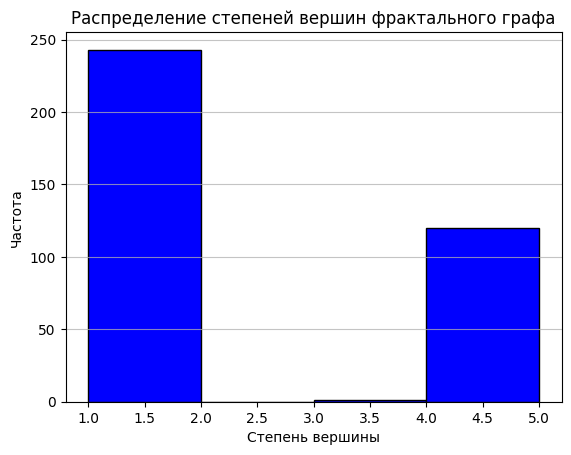

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import math

def fractal_tree(G, parent, depth, max_depth, branch_angle):
    if depth > max_depth:
        return
    num_branches = 3  # Количество ветвей
    branch_length = 0.7  # Длина ветвей
    for i in range(num_branches):
        angle = (i - (num_branches - 1) / 2) * branch_angle
        x_new = G.nodes[parent]['x'] + branch_length * depth * math.cos(angle)
        y_new = G.nodes[parent]['y'] + branch_length * depth * math.sin(angle)
        child = len(G.nodes)  # Идентификатор новой вершины
        G.add_node(child, x=x_new, y=y_new, pos=(x_new, y_new))  # Добавляем атрибут 'pos' для новой вершины
        G.add_edge(parent, child)
        fractal_tree(G, child, depth + 1, max_depth, branch_angle)

# Создаем пустой граф
G = nx.Graph()
G.add_node(0, x=0, y=0, pos=(0, 0))  # Начальная вершина с атрибутом 'pos'

# Вызываем функцию для построения фрактального дерева
fractal_tree(G, 0, 1, 5, math.pi / 4)  # Максимальная глубина 5, угол между ветвями pi/4

# Рассчитываем среднюю степень вершины
average_degree = sum(dict(G.degree()).values()) / len(G)
print("Средняя степень вершины фрактального графа:", average_degree)

# Построим распределение степеней вершин
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # Получаем степени вершин
plt.hist(degree_sequence, bins=range(1, max(degree_sequence) + 2), color='blue', edgecolor='black')
plt.title("Распределение степеней вершин фрактального графа")
plt.xlabel("Степень вершины")
plt.ylabel("Частота")
plt.grid(axis='y', alpha=0.75)
plt.show()



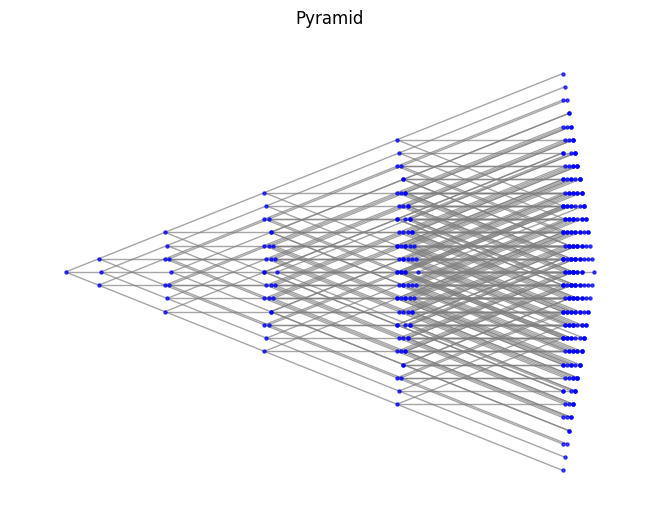

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import math

def fractal_tree(G, parent, depth, max_depth, branch_angle):
    if depth > max_depth:
        return
    num_branches = 3  # Количество ветвей
    branch_length = 0.7  # Длина ветвей
    for i in range(num_branches):
        angle = (i - (num_branches - 1) / 2) * branch_angle
        x_new = G.nodes[parent]['x'] + branch_length * depth * math.cos(angle)
        y_new = G.nodes[parent]['y'] + branch_length * depth * math.sin(angle)
        child = len(G.nodes)  # Идентификатор новой вершины
        G.add_node(child, x=x_new, y=y_new, pos=(x_new, y_new))  # Добавляем атрибут 'pos' для новой вершины
        G.add_edge(parent, child)
        fractal_tree(G, child, depth + 1, max_depth, branch_angle)

# Создаем пустой граф
G = nx.Graph()
G.add_node(0, x=0, y=0, pos=(0, 0))  # Начальная вершина с атрибутом 'pos'

# Вызываем функцию для построения фрактального дерева
fractal_tree(G, 0, 1, 5, math.pi / 9)  # Максимальная глубина 5, угол между ветвями pi/4

# Рисуем граф
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=False, node_size=5, node_color='blue', edge_color='gray', alpha=0.7)
plt.title("Pyramid")
plt.show()



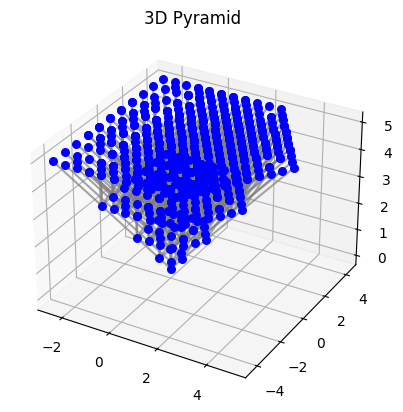

In [26]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

def fractal_pyramid(G, parent, depth, max_depth, branch_angle):
    if depth > max_depth:
        return
    num_branches = 5  # Увеличиваем количество ветвей для более сложной структуры
    branch_length = 0.5  # Оставляем длину ветвей
    for i in range(num_branches):
        angle = (i - (num_branches - 1) / 2) * branch_angle
        x_new = G.nodes[parent]['x'] + branch_length * depth * math.cos(angle)
        y_new = G.nodes[parent]['y'] + branch_length * depth * math.sin(angle)
        z_new = G.nodes[parent]['z'] + branch_length * depth
        child = len(G.nodes)  # Идентификатор новой вершины
        G.add_node(child, x=x_new, y=y_new, z=z_new, pos=(x_new, y_new, z_new))  # Добавляем атрибут 'pos' для новой вершины
        G.add_edge(parent, child)
        # Рекурсивно вызываем функцию для каждой новой вершины
        fractal_pyramid(G, child, depth + 1, max_depth, branch_angle)

# Создаем пустой граф
G = nx.Graph()
G.add_node(0, x=0, y=0, z=0, pos=(0, 0, 0))  # Начальная вершина с атрибутом 'pos'

# Вызываем функцию для построения фрактальной пирамиды
fractal_pyramid(G, 0, 1, 4, math.pi / 3)  # Максимальная глубина 4, угол между ветвями pi/3

# Рисуем граф в трехмерном пространстве
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pos = nx.get_node_attributes(G, 'pos')

# Рисуем вершины
for node, p in pos.items():
    ax.scatter(p[0], p[1], p[2], c='blue', s=30)

# Рисуем ребра
for u, v in G.edges():
    ax.plot([pos[u][0], pos[v][0]], [pos[u][1], pos[v][1]], [pos[u][2], pos[v][2]], c='gray', alpha=0.7)

plt.title("3D Pyramid ")
plt.show()


Средняя степень вершины фрактального графа: 1.997439180537772


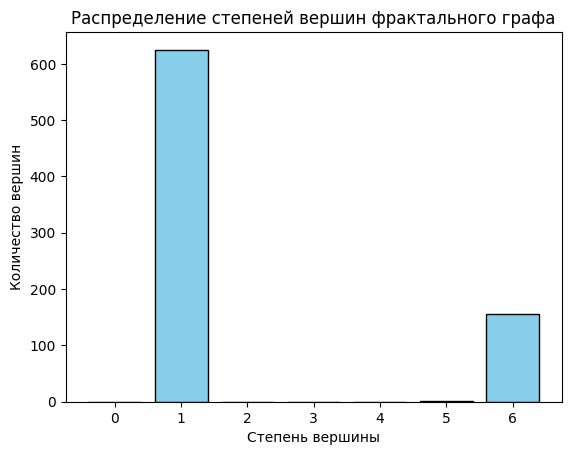

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
import math

def fractal_pyramid(G, parent, depth, max_depth, branch_angle):
    if depth > max_depth:
        return
    num_branches = 5  # Увеличиваем количество ветвей для более сложной структуры
    branch_length = 0.5  # Оставляем длину ветвей
    for i in range(num_branches):
        angle = (i - (num_branches - 1) / 2) * branch_angle
        x_new = G.nodes[parent]['x'] + branch_length * depth * math.cos(angle)
        y_new = G.nodes[parent]['y'] + branch_length * depth * math.sin(angle)
        z_new = - G.nodes[parent]['z'] + branch_length * depth  # Изменяем знак координаты z
        child = len(G.nodes)  # Идентификатор новой вершины
        G.add_node(child, x=x_new, y=y_new, z=z_new, pos=(x_new, y_new, z_new))  # Добавляем атрибут 'pos' для новой вершины
        G.add_edge(parent, child)
        # Рекурсивно вызываем функцию для каждой новой вершины
        fractal_pyramid(G, child, depth + 1, max_depth, branch_angle)

# Создаем пустой граф
G = nx.Graph()
G.add_node(0, x=0, y=0, z=0, pos=(0, 0, 0))  # Начальная вершина с атрибутом 'pos'

# Вызываем функцию для построения фрактальной пирамиды
fractal_pyramid(G, 0, 1, 4, math.pi / 3)  # Максимальная глубина 4, угол между ветвями pi/3

# Рассчитываем среднюю степень вершины
avg_degree = sum(dict(nx.degree(G)).values()) / len(G)
print("Средняя степень вершины фрактального графа:", avg_degree)

# Построение распределения степеней вершин
degree_hist = nx.degree_histogram(G)
plt.bar(range(len(degree_hist)), degree_hist, color='skyblue', edgecolor='black')
plt.xlabel('Степень вершины')
plt.ylabel('Количество вершин')
plt.title('Распределение степеней вершин фрактального графа')
plt.show()
